In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# concatoutputs for sumorl model 
num_of_epsiodes = 45
file_paths = [f'outputs - train/sumo_rl/episodes/dqn_conn0_ep{i}.csv' for i in range(1, num_of_epsiodes+1)]

all_data = []

# Plot each file

for file_path in file_paths:
    # Load the CSV file
    data = pd.read_csv(file_path)
    all_data.append(data)

concatenated_data = pd.concat(all_data, ignore_index=True)
concatenated_data = concatenated_data.drop(columns='step')
concatenated_data.insert(0, 'episode', concatenated_data.index+1)
concatenated_data.to_csv('outputs - train/sumo_rl/episodes/all_episodes.csv',  index=False)

In [ ]:
# concat outputs for andre model

num_of_epsiodes = 45
file_paths = [f'outputs - train/Andrea/episodes/output_values_ep_{i}.csv' for i in range(1, num_of_epsiodes+1)]

all_data = []

# Plot each file

for file_path in file_paths:
    # Load the CSV file
    data = pd.read_csv(file_path)
    all_data.append(data)

concatenated_data = pd.concat(all_data, ignore_index=True)
concatenated_data.to_csv('outputs - train/Andrea/episodes/all_episodes.csv',  index=False)

In [3]:
output_andrea_path = 'outputs - train/Andrea/episodes/all_episodes.csv'
output_sumorl_path = 'outputs - train/sumo_rl/episodes/all_episodes.csv'
output_basictls_path = 'outputs - train/BasicTLS/output.csv'

data_andrea = pd.read_csv(output_andrea_path)
data_sumorl = pd.read_csv(output_sumorl_path)
data_basictls = pd.read_csv(output_basictls_path)[:45] # I want the first 45 episode only (it has 150)

In [21]:
data_andrea.head()

,episode,reward,accumulated_wait_times,accumulated_avg_wait_times,accumulated_queue_length,accumulated_avg_queue_length,accumulated_total_fuel_consumption,accumulated_avg_fuel_consumption,accumulated_pedestrian_wait_times,accumulated_pedestrian_avg_wait_times
0,1,-188261.0,62537,30.490980,62537,6.514271,9.902383e+07,48280.754844,0,0
1,2,-202379.0,128203,30.937017,128203,13.354479,2.007539e+08,48444.465882,0,0
2,3,-194292.0,191833,30.821497,191833,19.982604,3.004144e+08,48267.088639,0,0
3,4,-154999.0,247367,29.994786,247367,25.767396,3.938588e+08,47757.826053,0,0
4,5,-172607.0,306864,29.973042,306864,31.965000,4.900974e+08,47870.427876,0,0


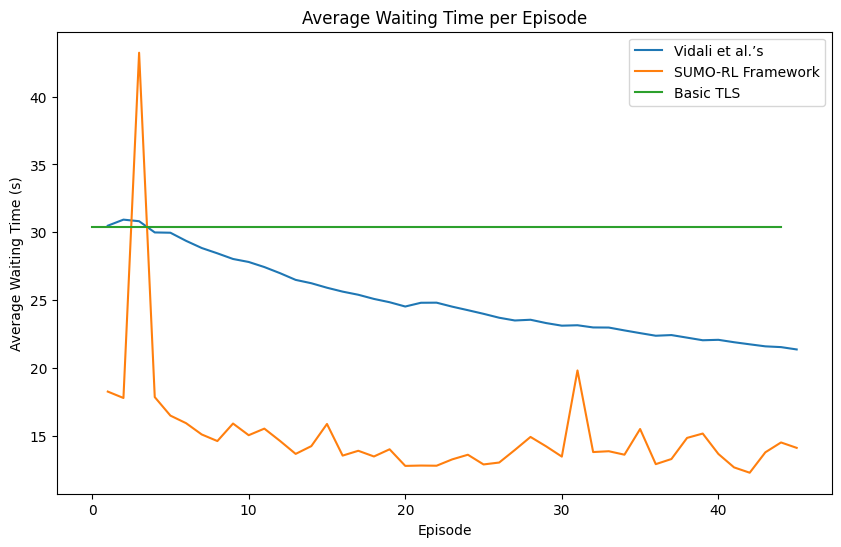

In [6]:
plt.figure(figsize=(10, 6))
x = 'episode'
y ='accumulated_avg_wait_times'
plt.plot(data_andrea[x], data_andrea[y], label='Vidali et al.’s', linewidth=1.5)
plt.plot(data_sumorl[x], data_sumorl[y], label='SUMO-RL Framework', linewidth=1.5)
plt.plot(data_basictls[x], data_basictls[y], label='Basic TLS', linewidth=1.5)

# Add titles and labels
plt.title('Average Waiting Time per Episode')
plt.xlabel('Episode')
plt.ylabel('Average Waiting Time (s)')
plt.legend()
# Display the plot
plt.savefig('average_waiting_time_plot.png', dpi=300, bbox_inches='tight')
plt.show()